In [162]:
#=========================================================================
#                         MODELOS DE APRENDIZAJE                 
#                               PRUEBA FINAL                     
#
#
# Autor: Karina Esther Ramírez Rivera
# Fecha: 09/10/2022
#=========================================================================

Importamos librerías

In [224]:
# Librería para análisis de datos
import re
import pandas as pd
#import numpy as np

# Librerías para gráficos
import matplotlib.pyplot as plot
import seaborn as sns

# Librerías para modelos de aprendizaje automático
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import graphviz


from sklearn import tree
from dtreeviz.trees import dtreeviz

from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import precision_score, plot_confusion_matrix
from imblearn.over_sampling import SMOTE, RandomOverSampler


# For chapter 5

import time




Funciones

In [246]:
def get_clf_name(clf):
    return re.sub('[^A-Za-z0-9]+', '', str(clf.__class__).split('.')[-1])

In [252]:
def run_experiment(x_train, y_train, x_test, y_test, clf):
    #clf = clf.copy()  No es necesario
    
    print(get_clf_name(clf))
    clf.fit(x_train, y_train)
    
    # Matriz de confusión (entrenamiento)
    y_pred = clf.predict(x_train)
    cm = confusion_matrix(y_train, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Train: ", accuracy_score(y_train, y_pred))
    
    # Matriz de confusión (test)
    y_pred = clf.predict(x_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    print("Accuracy Test: ", accuracy_score(y_test, y_pred))
    return disp

Carga de atchivo de datos

In [164]:
df = pd.read_csv("C:\\Users\\kar_r\\Desktop\\UIDE_SIS_INFORMACION\\2_MATERIAS\\2_MODELOS_APRENDIZAJE\\4_Examen\wdbc.data")
df.shape
df.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Limpieza de datos

In [165]:
# Colocamos nombres de las columnas
headers = ['ID','Diagnostico','Radio_m','Textura_m','Perimetro_m','Area_m','Suavidad_m','Compacidad_m','Concavidad_m','PuntosConcavos_m','Simetria_m','DimFractal_m','Radio_se','Textura_se','Perimetro_se','Area_se','Suavidad_se','Compacidad_se','Concavidad_se','PuntosConcavos_se','Simetria_se','DimFractal_se','Radio_ev','Textura_ev','Perimetro_ev','Area_ev','Suavidad_ev','Compacidad_ev','Concavidad_ev','PuntosConcavos_ev','Simetria_ev','DimFractal_ev']
df.columns=headers
df.head()

,ID,Diagnostico,Radio_m,Textura_m,Perimetro_m,Area_m,Suavidad_m,Compacidad_m,Concavidad_m,PuntosConcavos_m,...,Radio_ev,Textura_ev,Perimetro_ev,Area_ev,Suavidad_ev,Compacidad_ev,Concavidad_ev,PuntosConcavos_ev,Simetria_ev,DimFractal_ev
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 568 non-null    int64  
 1   Diagnostico        568 non-null    object 
 2   Radio_m            568 non-null    float64
 3   Textura_m          568 non-null    float64
 4   Perimetro_m        568 non-null    float64
 5   Area_m             568 non-null    float64
 6   Suavidad_m         568 non-null    float64
 7   Compacidad_m       568 non-null    float64
 8   Concavidad_m       568 non-null    float64
 9   PuntosConcavos_m   568 non-null    float64
 10  Simetria_m         568 non-null    float64
 11  DimFractal_m       568 non-null    float64
 12  Radio_se           568 non-null    float64
 13  Textura_se         568 non-null    float64
 14  Perimetro_se       568 non-null    float64
 15  Area_se            568 non-null    float64
 16  Suavidad_se        568 non

In [167]:
# Reemplazamos los valores de la variable "Diagnostico"
print("Categorías: ",df.groupby(["Diagnostico"]).Diagnostico.count())
Diag_mapping = {'B':0,'M':1}
df.Diagnostico=df.Diagnostico.map(Diag_mapping)
print("Categorías 2: ",df.groupby(["Diagnostico"]).Diagnostico.count())
df.head()

Categorías:  Diagnostico
B    357
M    211
Name: Diagnostico, dtype: int64
Categorías 2:  Diagnostico
0    357
1    211
Name: Diagnostico, dtype: int64


,ID,Diagnostico,Radio_m,Textura_m,Perimetro_m,Area_m,Suavidad_m,Compacidad_m,Concavidad_m,PuntosConcavos_m,...,Radio_ev,Textura_ev,Perimetro_ev,Area_ev,Suavidad_ev,Compacidad_ev,Concavidad_ev,PuntosConcavos_ev,Simetria_ev,DimFractal_ev
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [168]:
# Revisamos duplicados
df.duplicated()


0      False
1      False
2      False
3      False
4      False
       ...  
563    False
564    False
565    False
566    False
567    False
Length: 568, dtype: bool

In [169]:
# Revisamos valores únicos
df.ID.value_counts().unique

<bound method Series.unique of 842517     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: ID, Length: 568, dtype: int64>

In [170]:
# Revisamos missing values 
df.isnull()

,ID,Diagnostico,Radio_m,Textura_m,Perimetro_m,Area_m,Suavidad_m,Compacidad_m,Concavidad_m,PuntosConcavos_m,...,Radio_ev,Textura_ev,Perimetro_ev,Area_ev,Suavidad_ev,Compacidad_ev,Concavidad_ev,PuntosConcavos_ev,Simetria_ev,DimFractal_ev
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [171]:
# Retiramos variable “ID” para iniciar el análisis
df.drop("ID",axis=1,inplace=True)
df.shape
df.head()

,Diagnostico,Radio_m,Textura_m,Perimetro_m,Area_m,Suavidad_m,Compacidad_m,Concavidad_m,PuntosConcavos_m,Simetria_m,...,Radio_ev,Textura_ev,Perimetro_ev,Area_ev,Suavidad_ev,Compacidad_ev,Concavidad_ev,PuntosConcavos_ev,Simetria_ev,DimFractal_ev
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Descriptivos

In [172]:
df.describe()

,Diagnostico,Radio_m,Textura_m,Perimetro_m,Area_m,Suavidad_m,Compacidad_m,Concavidad_m,PuntosConcavos_m,Simetria_m,...,Radio_ev,Textura_ev,Perimetro_ev,Area_ev,Suavidad_ev,Compacidad_ev,Concavidad_ev,PuntosConcavos_ev,Simetria_ev,DimFractal_ev
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,0.371479,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,0.483626,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,0.000000,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,1.000000,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Gráficos

<AxesSubplot:xlabel='Diagnostico', ylabel='count'>

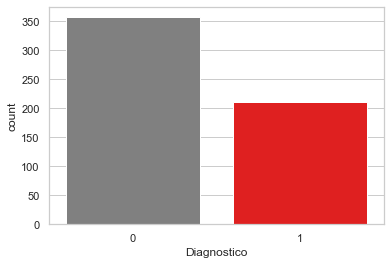

In [173]:
# Gráfico variable de interés
sns.set_theme(style="whitegrid")
sns.countplot(x="Diagnostico", data=df,label="count", palette={"grey","red"})


array([[<AxesSubplot:title={'center':'Diagnostico'}>,
        <AxesSubplot:title={'center':'Radio_m'}>,
        <AxesSubplot:title={'center':'Textura_m'}>,
        <AxesSubplot:title={'center':'Perimetro_m'}>,
        <AxesSubplot:title={'center':'Area_m'}>,
        <AxesSubplot:title={'center':'Suavidad_m'}>],
       [<AxesSubplot:title={'center':'Compacidad_m'}>,
        <AxesSubplot:title={'center':'Concavidad_m'}>,
        <AxesSubplot:title={'center':'PuntosConcavos_m'}>,
        <AxesSubplot:title={'center':'Simetria_m'}>,
        <AxesSubplot:title={'center':'DimFractal_m'}>,
        <AxesSubplot:title={'center':'Radio_se'}>],
       [<AxesSubplot:title={'center':'Textura_se'}>,
        <AxesSubplot:title={'center':'Perimetro_se'}>,
        <AxesSubplot:title={'center':'Area_se'}>,
        <AxesSubplot:title={'center':'Suavidad_se'}>,
        <AxesSubplot:title={'center':'Compacidad_se'}>,
        <AxesSubplot:title={'center':'Concavidad_se'}>],
       [<AxesSubplot:title={'cent

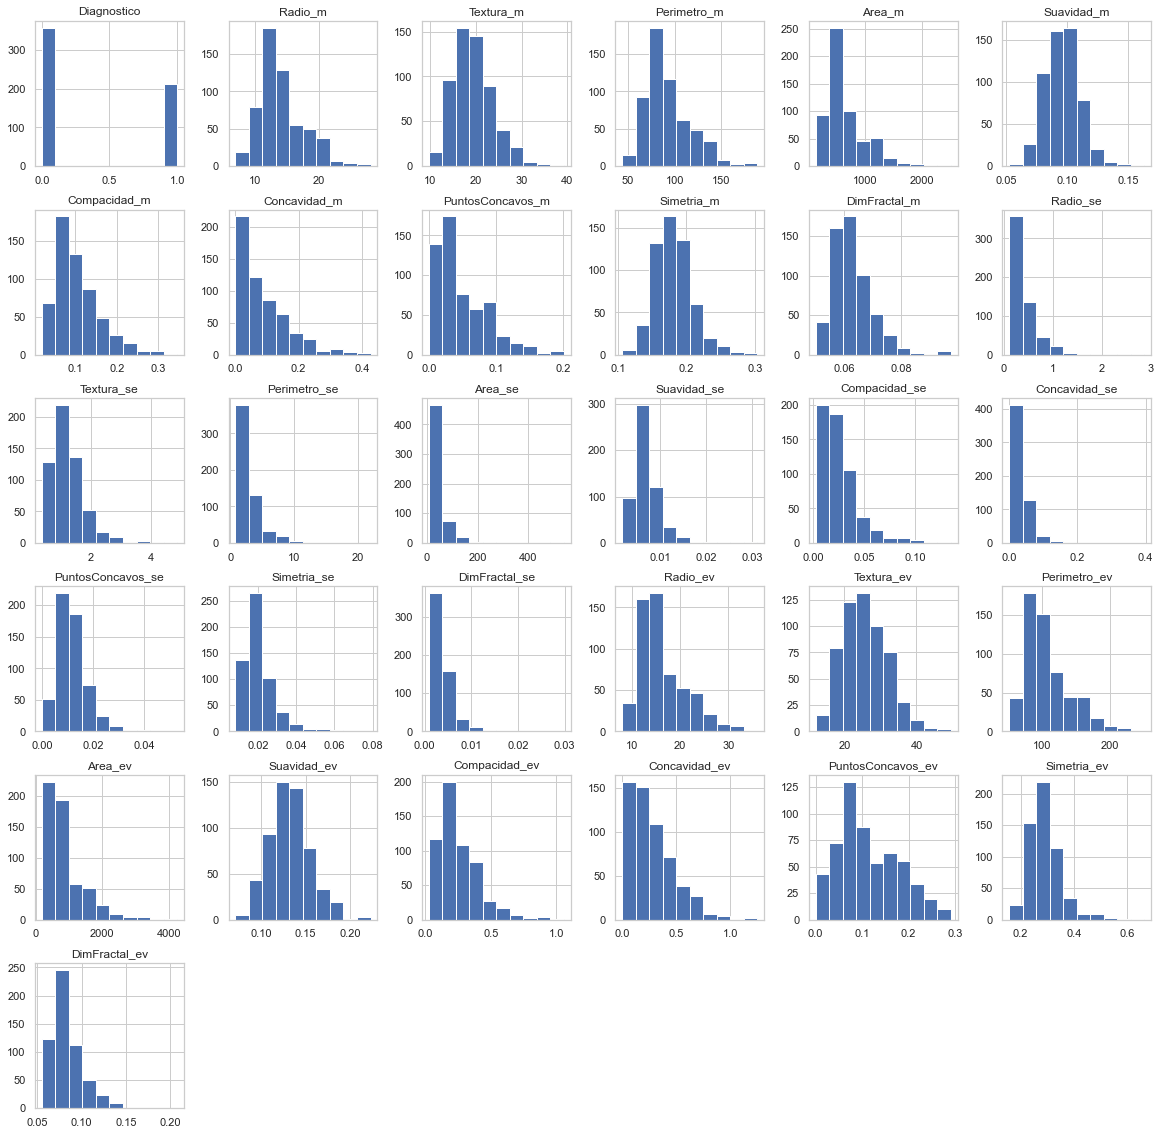

In [174]:
# Histograma de las variables
df.hist(bins=10,figsize=(20,20),grid=True)

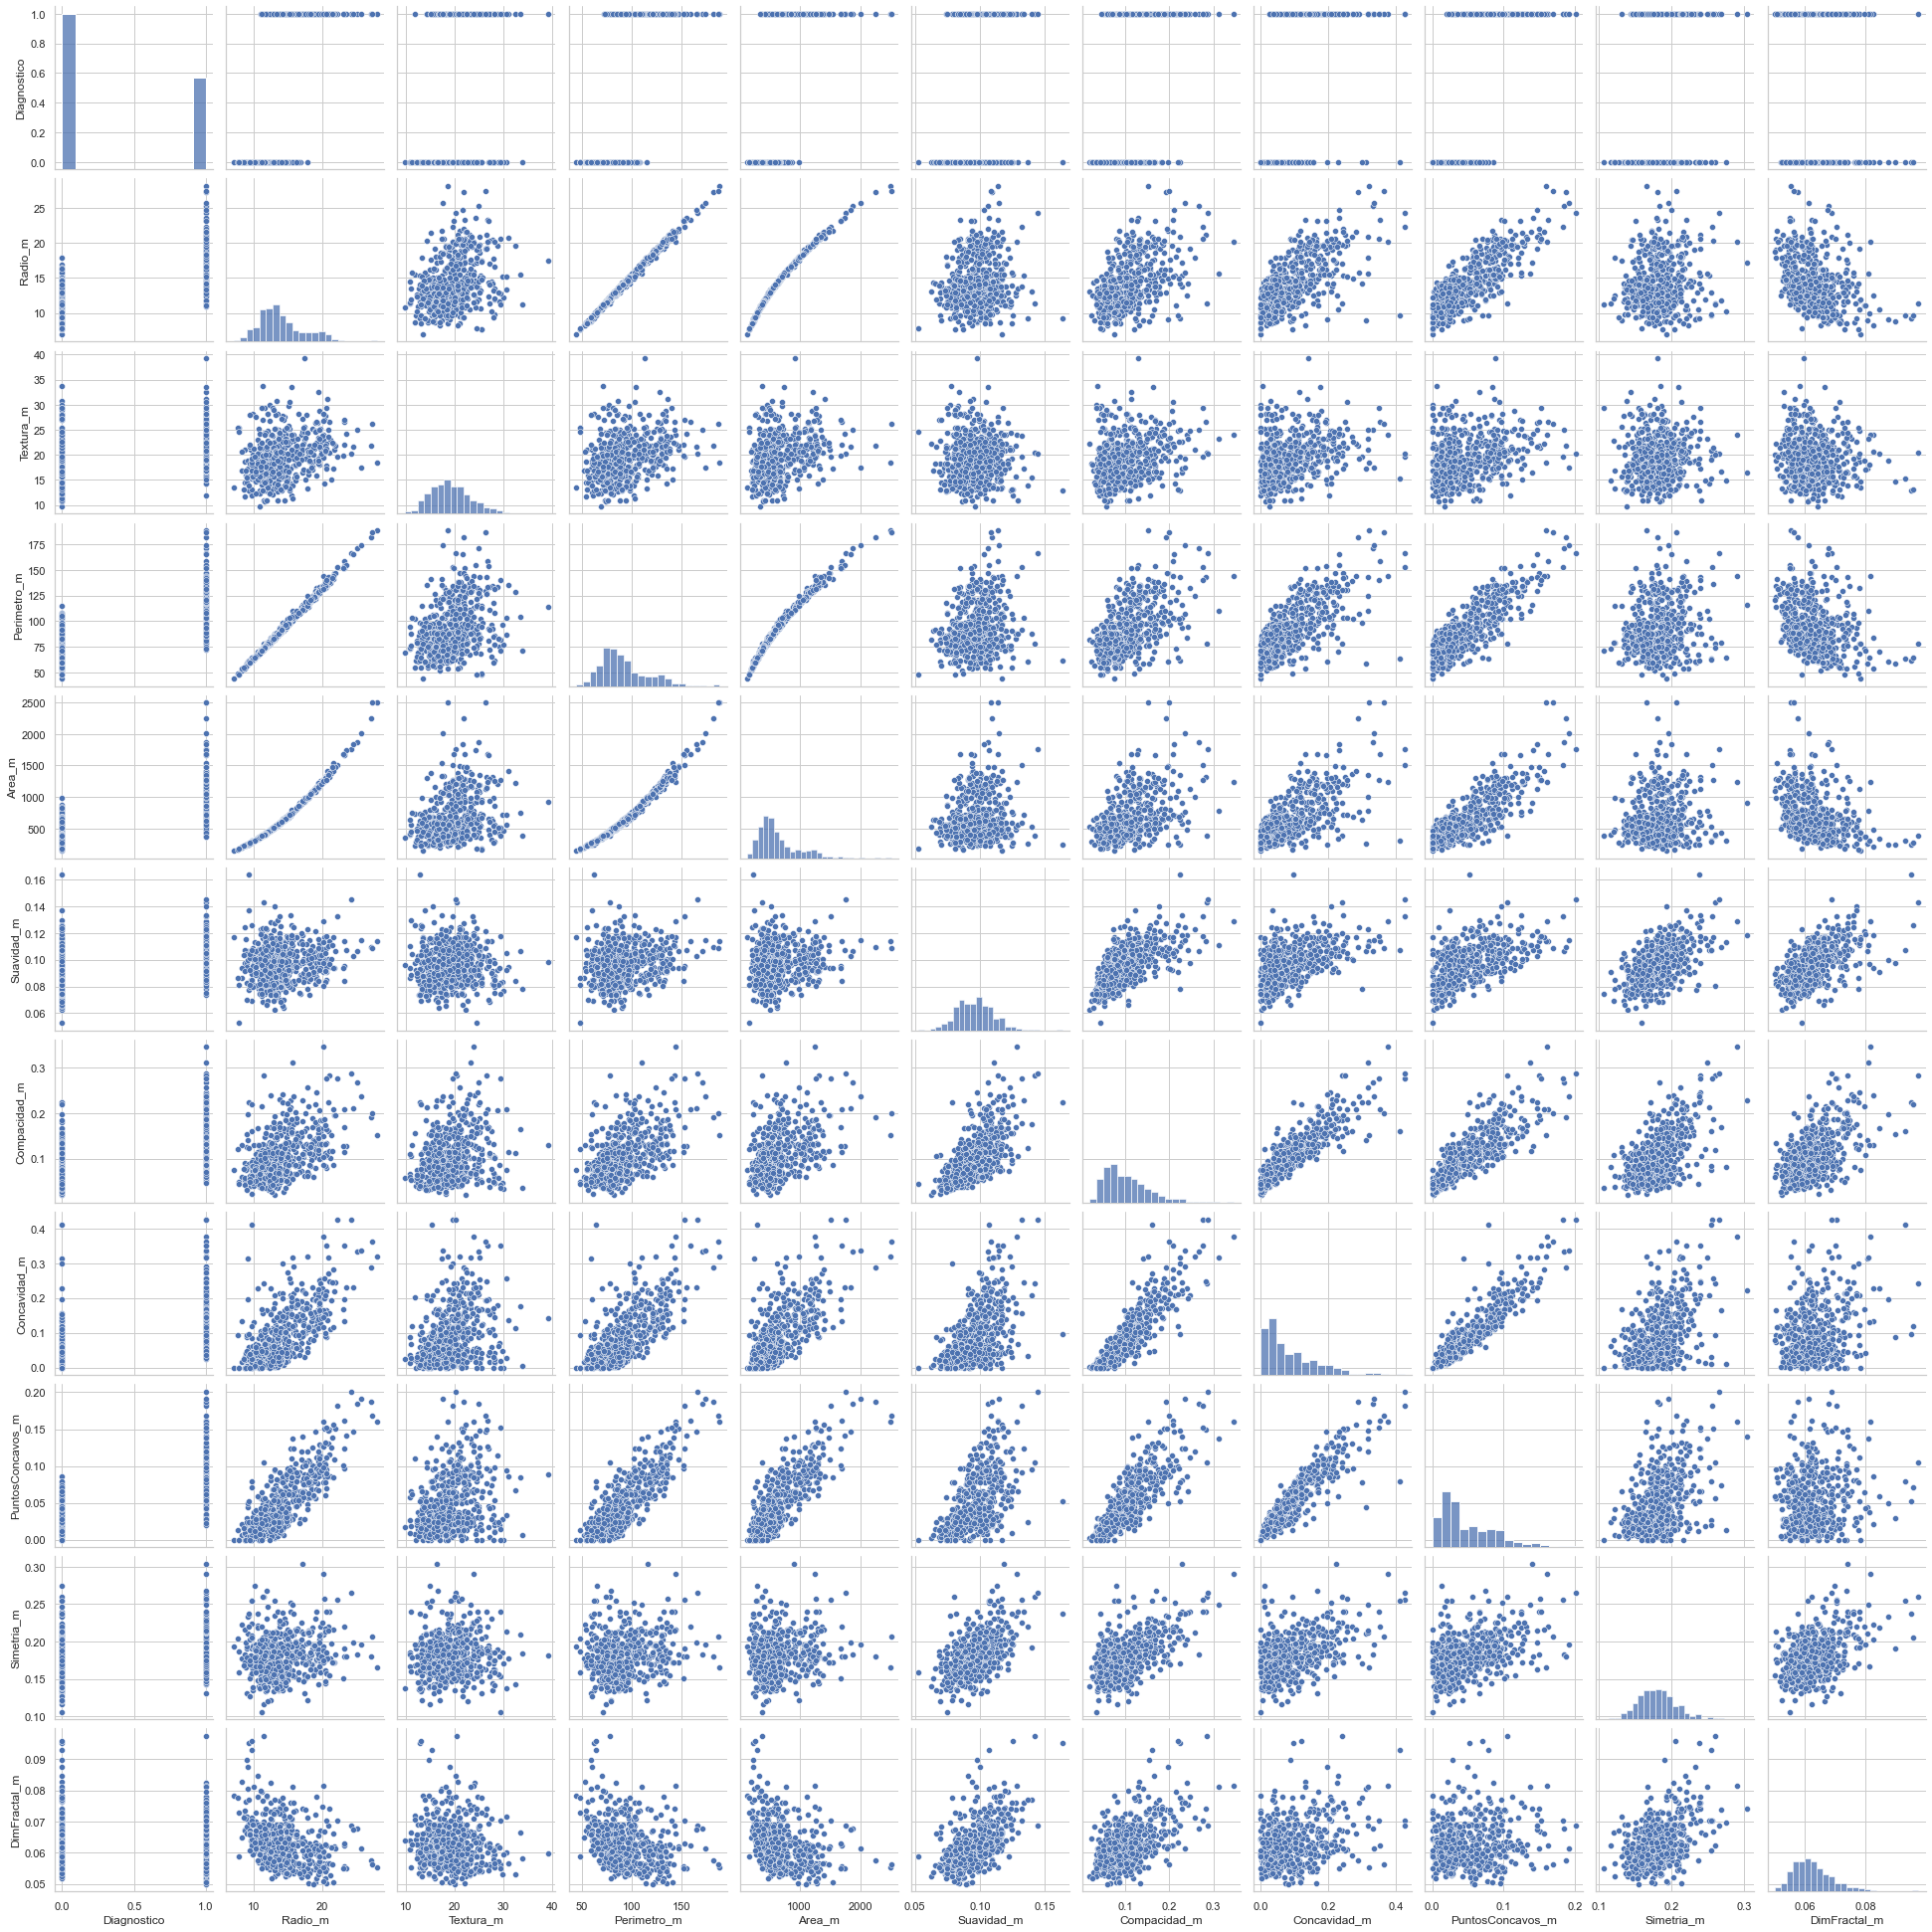

In [175]:
# Distribuciones bivariadas

Set1 = df[['Diagnostico','Radio_m','Textura_m','Perimetro_m','Area_m','Suavidad_m','Compacidad_m','Concavidad_m','PuntosConcavos_m','Simetria_m','DimFractal_m']]
sns.pairplot(Set1)

<AxesSubplot:>

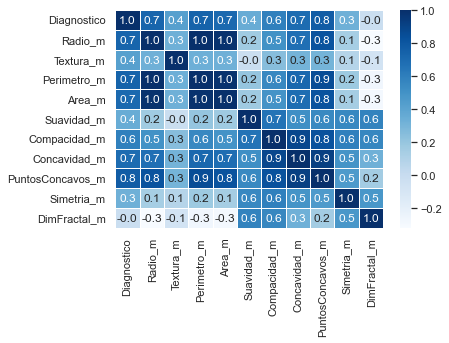

In [176]:
# Matriz de correlación

# Con todas las variables
# corr = df.corr()
# sns.heatmap(corr, annot = True, cmap="Blues")
# print(corr)

sns.heatmap(Set1.corr(),annot=True, cmap="Blues", linewidths=.5,fmt='.1f')

# MODELOS DE APRENDIZAJE AUTOMÁTICO

Datos de entrenamiento y test

In [253]:
x = df[df.columns.drop("Diagnostico")]
y = df["Diagnostico"]

x_train, x_test, y_train, y_test =train_test_split (x, y,test_size=0.33,random_state=42)
x_train

#pd.DataFrame(x_train).describe()
#x_test



,Radio_m,Textura_m,Perimetro_m,Area_m,Suavidad_m,Compacidad_m,Concavidad_m,PuntosConcavos_m,Simetria_m,DimFractal_m,...,Radio_ev,Textura_ev,Perimetro_ev,Area_ev,Suavidad_ev,Compacidad_ev,Concavidad_ev,PuntosConcavos_ev,Simetria_ev,DimFractal_ev
249,20.940,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.12110,0.3172,0.69910,0.21050,0.3126,0.07849
25,14.580,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,0.06924,...,17.62,33.21,122.40,896.9,0.15250,0.6643,0.55390,0.27010,0.4264,0.12750
396,12.800,17.46,83.05,508.3,0.08044,0.08895,0.07390,0.04083,0.1574,0.05750,...,13.74,21.06,90.72,591.0,0.09534,0.1812,0.19010,0.08296,0.1988,0.07053
518,12.750,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.14750,0.1979,0.14230,0.08045,0.3071,0.08557
264,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,0.05674,...,32.49,47.16,214.00,3432.0,0.14010,0.2644,0.34420,0.16590,0.2868,0.08218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,17.200,24.52,114.20,929.4,0.10710,0.18300,0.16920,0.07944,0.1927,0.06487,...,23.32,33.82,151.60,1681.0,0.15850,0.7394,0.65660,0.18990,0.3313,0.13390
106,12.360,18.54,79.01,466.7,0.08477,0.06815,0.02643,0.01921,0.1602,0.06066,...,13.29,27.49,85.56,544.1,0.11840,0.1963,0.19370,0.08442,0.2983,0.07185
270,11.290,13.04,72.23,388.0,0.09834,0.07608,0.03265,0.02755,0.1769,0.06270,...,12.32,16.18,78.27,457.5,0.13580,0.1507,0.12750,0.08750,0.2733,0.08022
435,12.870,19.54,82.67,509.2,0.09136,0.07883,0.01797,0.02090,0.1861,0.06347,...,14.45,24.38,95.14,626.9,0.12140,0.1652,0.07127,0.06384,0.3313,0.07735


In [254]:
# Respaldo de datos de test
x_test_copy = x_test.copy()
y_test_copy = y_test.copy()

In [256]:
# MODELOS
linear_clf = SGDClassifier(max_iter=1000, tol=1e-3)
knn_clf = KNeighborsClassifier (n_neighbors=1)
tree_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier(max_depth=3)

SGDClassifier
Accuracy Train:  0.9210526315789473
Accuracy Test:  0.9042553191489362


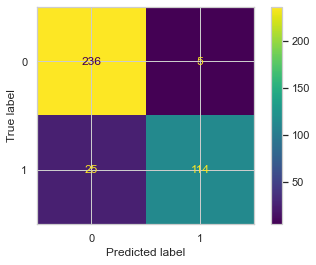

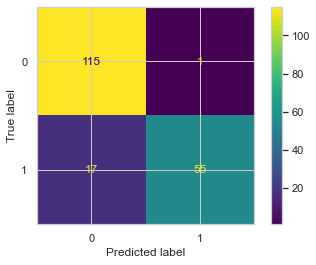

In [257]:
# MODELO 1: LINEAR CLASSIFIER

run_experiment(x_train, y_train, x_test, y_test, linear_clf)

DecisionTreeClassifier
Accuracy Train:  1.0
Accuracy Test:  0.9267241379310345


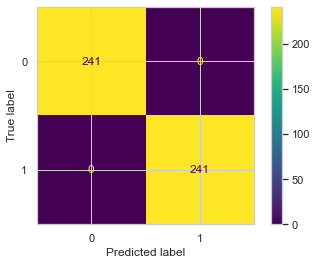

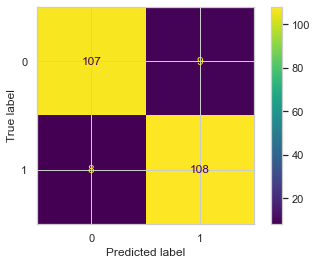

In [263]:
#MODELO 2 - DECISION TREE CLASSIFIER

run_experiment(x_train, y_train, x_test, y_test, tree_clf)

3


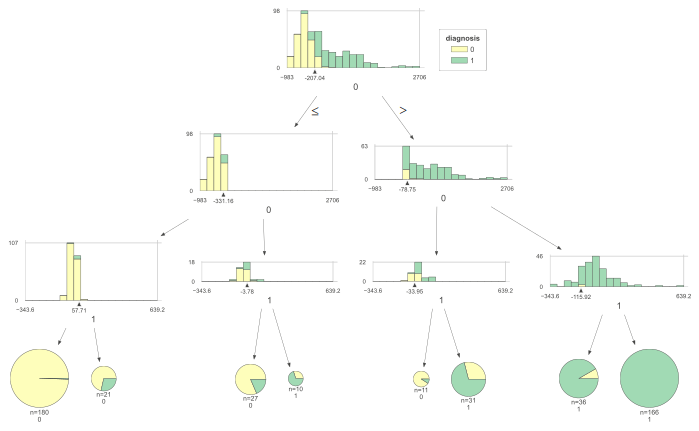

In [258]:
# MODELO 3 - RANDOM FOREST CLASSIFIER

# Sobremuestreo
oversampler = RandomOverSampler(sampling_strategy='minority')
x_train, y_train = oversampler.fit_resample(x_train, y_train)
x_test, y_test = oversampler.fit_resample(x_test, y_test)

pca = PCA(n_components=3)
pca.fit(x_train)

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(pca.transform(x_train), y_train)
print(clf.get_depth())
viz = draw_tree(pca.transform(x_train), y_train, clf)
viz

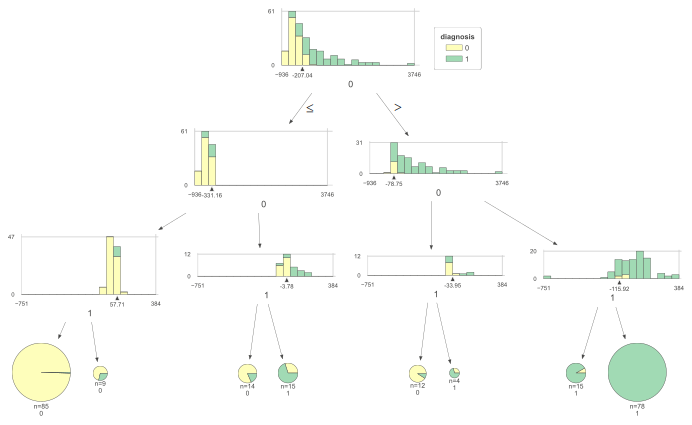

In [259]:
viz = draw_tree(pca.transform(x_test), y_test, clf)
viz

RandomForestClassifier
Accuracy Train:  0.9315352697095436
Accuracy Test:  0.8836206896551724


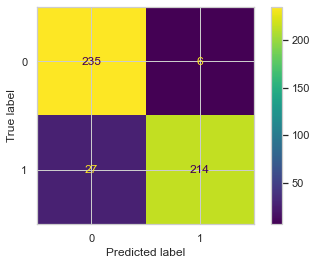

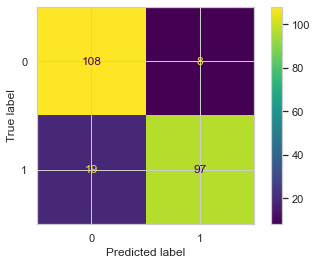

In [261]:
run_experiment(pca.transform(x_train), y_train, pca.transform(x_test), y_test, rf_clf)

KNeighborsClassifier
Accuracy Train:  1.0
Accuracy Test:  0.896551724137931


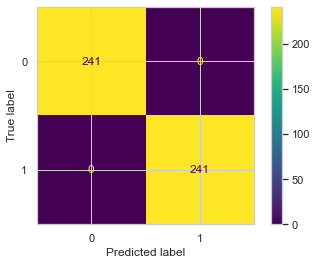

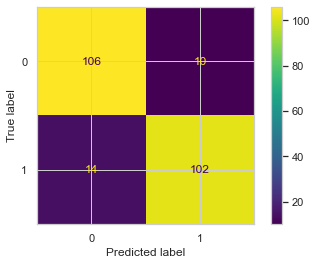

In [265]:
#MODELO 4 KNeighborsClassifier
run_experiment(x_train, y_train, x_test, y_test, knn_clf)

In [178]:
# Escalamiento

scaler = StandardScaler()
scaler.fit(x_train)
trainX = scaler.transform(x_train)
testX = scaler.transform(x_test)

